In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [36]:
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from tensorflow.keras.callbacks import *

In [37]:
CLASS_NAMES= ['healthy', 'mild', 'moderate', 'severe']
IMG_HEIGHT = 128
IMG_WIDTH = 128
CHANNELS = 3
NUM_CLASSES = len(CLASS_NAMES)

# **ResNET**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#load data
data_x = np.load('data_x_aumentated_normalized.npy') #images
data_y = np.load('data_y_aumentated_normalized.npy') #labels
TOTAL_IMAGES = len(data_y)
print("TOTAL_IMAGES = ", TOTAL_IMAGES)

TOTAL_IMAGES =  2368


# **Splitting data in train - validation - test**

In [40]:
#percentage of the dataset which will be on TRAIN - TEST - VALIDATION
TRAIN_PERCENTAGE = 0.8
TEST_PERCENTAGE = 0.1
VALIDATION_PERCENTAGE = 0.1

In [41]:
train_size = int(TRAIN_PERCENTAGE * TOTAL_IMAGES)
test_size = int(TEST_PERCENTAGE * TOTAL_IMAGES)
validation_size = int(VALIDATION_PERCENTAGE * TOTAL_IMAGES)

In [42]:
train_x = data_x[:train_size]
train_y = data_y[:train_size]
data_x = data_x[train_size:]
data_y = data_y[train_size:]

test_x = data_x[:test_size]
test_y = data_y[:test_size]
data_x = data_x[test_size:]
data_y = data_y[test_size:]

validation_x = data_x #all the remainder we can let on validation
validation_y = data_y
del data_x
del data_y

In [43]:
print("train_size = ", len(train_y))
print("test_size = ", len(test_y))
print("validation_size = ", len(validation_y))

train_size =  1894
test_size =  236
validation_size =  238


In [44]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from IPython.display import SVG
import scipy.misc

In [46]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications import EfficientNetB1
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import EfficientNetB3
# from tensorflow.keras.applications import EfficientNetB4
# from tensorflow.keras.applications import EfficientNetB5
# from tensorflow.keras.applications import EfficientNetB6
# from tensorflow.keras.applications import EfficientNetB7
# from tensorflow.keras.applications import *

In [47]:
import tensorflow.keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

In [48]:
model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH, CHANNELS),
    pooling=None,
    classes=NUM_CLASSES,
   # classifier_activation="softmax",
#    **kwargs
)

9406464/9406464 [==============================] - 1s 0us/step


In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers

new_model = models.Sequential()
new_model.add(model)
#3rd conv layer
new_model.add(tf.keras.layers.Conv2D(32, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#4th conv layer
new_model.add(tf.keras.layers.Conv2D(64, 3, padding="same"))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.MaxPooling2D(2))
#Flatten Layer
new_model.add(tf.keras.layers.Flatten())

new_model.add(tf.keras.layers.Dense(128, kernel_regularizer =tf.keras.regularizers.l2( l=0.01)))
new_model.add(tf.keras.layers.BatchNormalization())
new_model.add(tf.keras.layers.Activation("relu"))
new_model.add(tf.keras.layers.Dropout(0.2))
#output Dense Layer
new_model.add(tf.keras.layers.Dense(NUM_CLASSES))
new_model.add(tf.keras.layers.Activation('softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)


In [50]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 32)          368672    
                                                                 
 batch_normalization_6 (Batc  (None, 4, 4, 32)         128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 4, 4, 32)          0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                      

In [51]:
epochs = 100

#compila e treina o modelo com os dados carregados
new_model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer=adam)
model_trained = new_model.fit(train_x, train_y,epochs=epochs,verbose=2,validation_data=(validation_x, validation_y),shuffle=False)

Epoch 1/100
60/60 - 16s - loss: 1.7027 - acc: 0.6204 - val_loss: 2.3858 - val_acc: 0.2437 - 16s/epoch - 259ms/step
Epoch 2/100
60/60 - 8s - loss: 1.1227 - acc: 0.8136 - val_loss: 1.9955 - val_acc: 0.3487 - 8s/epoch - 135ms/step
Epoch 3/100
60/60 - 8s - loss: 0.7509 - acc: 0.9013 - val_loss: 2.3220 - val_acc: 0.3487 - 8s/epoch - 135ms/step
Epoch 4/100
60/60 - 8s - loss: 0.6092 - acc: 0.9187 - val_loss: 3.1486 - val_acc: 0.3025 - 8s/epoch - 135ms/step
Epoch 5/100
60/60 - 8s - loss: 0.4931 - acc: 0.9245 - val_loss: 1.6935 - val_acc: 0.4832 - 8s/epoch - 135ms/step
Epoch 6/100
60/60 - 8s - loss: 0.3423 - acc: 0.9541 - val_loss: 2.6185 - val_acc: 0.4538 - 8s/epoch - 135ms/step
Epoch 7/100
60/60 - 8s - loss: 0.3316 - acc: 0.9461 - val_loss: 2.6870 - val_acc: 0.3950 - 8s/epoch - 135ms/step
Epoch 8/100
60/60 - 8s - loss: 0.2973 - acc: 0.9393 - val_loss: 1.7655 - val_acc: 0.5126 - 8s/epoch - 135ms/step
Epoch 9/100
60/60 - 8s - loss: 0.2175 - acc: 0.9625 - val_loss: 3.3153 - val_acc: 0.4622 - 8s/

Epoch 73/100
60/60 - 9s - loss: 4.4696e-04 - acc: 1.0000 - val_loss: 2.5452 - val_acc: 0.6345 - 9s/epoch - 154ms/step
Epoch 74/100
60/60 - 9s - loss: 4.3276e-04 - acc: 1.0000 - val_loss: 2.4421 - val_acc: 0.6429 - 9s/epoch - 155ms/step
Epoch 75/100
60/60 - 9s - loss: 4.2072e-04 - acc: 1.0000 - val_loss: 2.2013 - val_acc: 0.6723 - 9s/epoch - 155ms/step
Epoch 76/100
60/60 - 9s - loss: 4.1116e-04 - acc: 1.0000 - val_loss: 2.0910 - val_acc: 0.6933 - 9s/epoch - 155ms/step
Epoch 77/100
60/60 - 9s - loss: 3.9045e-04 - acc: 1.0000 - val_loss: 1.9171 - val_acc: 0.7143 - 9s/epoch - 155ms/step
Epoch 78/100
60/60 - 9s - loss: 3.8249e-04 - acc: 1.0000 - val_loss: 1.7839 - val_acc: 0.7311 - 9s/epoch - 155ms/step
Epoch 79/100
60/60 - 9s - loss: 3.7893e-04 - acc: 1.0000 - val_loss: 1.6132 - val_acc: 0.7437 - 9s/epoch - 155ms/step
Epoch 80/100
60/60 - 9s - loss: 3.6335e-04 - acc: 1.0000 - val_loss: 1.5114 - val_acc: 0.7647 - 9s/epoch - 155ms/step
Epoch 81/100
60/60 - 9s - loss: 3.4445e-04 - acc: 1.0000

In [52]:
model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 16, 16, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 16, 16, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 16, 16, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 16, 16, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 8, 8, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 8, 8, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 8, 8, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 8, 8, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 8, 8, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 8, 8, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 8, 8, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 4, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [53]:
def getLayerIndexByName(model, layername):
    for idx, layer in enumerate(model.layers):
        if layer.name == layername:
            return idx

In [54]:
#print(getLayerIndexByName(new_model, 'flatten_1')) #just used to get the index of flatten layer

In [55]:
model_name = f'displasys_MobileNetV2-baseline-holdout-{epochs}epochs_dataAugmenting_l2_dropout.npy'
new_model.save(model_name)

INFO:tensorflow:Assets written to: displasys_MobileNetV2-baseline-holdout-100epochs_dataAugmenting_l2_dropout.npy\assets


INFO:tensorflow:Assets written to: displasys_MobileNetV2-baseline-holdout-100epochs_dataAugmenting_l2_dropout.npy\assets


# **Random Forest - flatting**

In [56]:
new_model_rf = keras.Model(inputs=new_model.input, outputs=new_model.get_layer(index=9).output)
featureVector = new_model_rf.predict(train_x)

60/60 [==============================] - 3s 39ms/step


In [57]:
featureVector2 = new_model_rf.predict(test_x)

8/8 [==============================] - 1s 91ms/step


In [58]:
print(featureVector.shape)

(1894, 64)


In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(featureVector,train_y)



RandomForestClassifier()

In [61]:
test_x.shape

(236, 128, 128, 3)

In [62]:
y_pred=clf.predict(featureVector2)

In [63]:
featureVector.shape

(1894, 64)

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.9449152542372882


# **Testes**

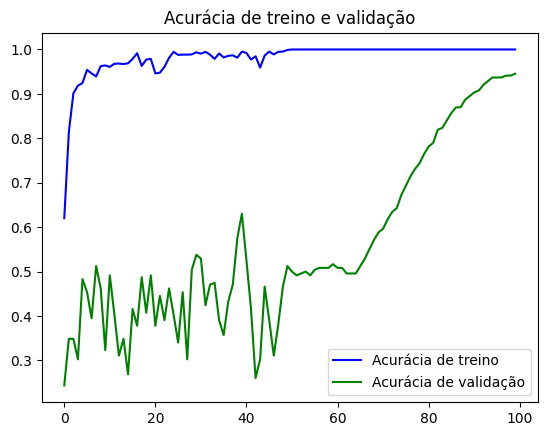

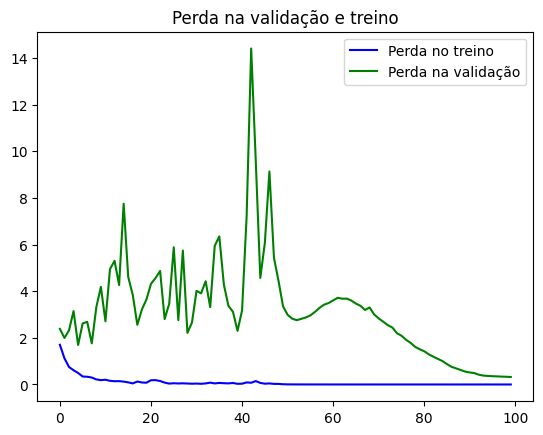

In [65]:
import matplotlib.pyplot as plt

accuracy = model_trained.history['acc']
val_accuracy = model_trained.history['val_acc']
loss = model_trained.history['loss']
val_loss = model_trained.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Acurácia de treino')
plt.plot(epochs, val_accuracy, 'g', label='Acurácia de validação')
plt.title('Acurácia de treino e validação')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Perda no treino')
plt.plot(epochs, val_loss, 'g', label='Perda na validação')
plt.title('Perda na validação e treino')
plt.legend()
plt.show()

In [66]:
#avalia a fase de teste

model_loss, model_accuracy = new_model.evaluate(test_x, test_y, verbose=1)

#mostra o resultado
print('Test loss:', model_loss)
print('Test accuracy:', model_accuracy)

8/8 [==============================] - 0s 42ms/step - loss: 0.3786 - acc: 0.9407
Test loss: 0.3786357641220093
Test accuracy: 0.9406779408454895


In [67]:
#faz a predição das imagens

from tensorflow.keras.utils import to_categorical

pred = new_model.predict(test_x, verbose=0)

pred_probs = np.argmax(pred,axis=1)

In [68]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [69]:
cm = confusion_matrix(test_y, pred_probs)

In [70]:
#gera os valores de falso positivo, falso negativo, verdadeiro positivo e verdadeiro negativo
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

f1score = f1_score(test_y, pred_probs, average='weighted')
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
accuracy    = (tp + tn) / (tp + tn + fp + fn)
precision   = tp / (tp + fp)


print("F1 Score:", f1score)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:  ", precision)
print("Accuracy:   ", accuracy)

F1 Score: 0.9410760801141383
Sensitivity: [0.95945946 0.92156863 0.86792453 1.        ]
Specificity: [1.         0.99459459 0.98360656 0.94382022]
Precision:   [1.         0.97916667 0.93877551 0.85294118]
Accuracy:    [0.98728814 0.97881356 0.95762712 0.95762712]
